# Teams: Data Cleaning and Analysis

First, we import the libraries that we will use during the analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Next, we import and explore the dataset that we created when scarping our source website.

In [2]:
scores = pd.read_csv(r"C:\Users\Honza Stuchlík\Documents\IES\Data Processing in Python\Czech-Football-League\scores.csv")
scores

,Game Week,Weekday,Date,Time,Home Team,Score,Away Team,Attendance,Venue,Referee,Match Report,Notes
0,1.0,Fri,2015-07-24,17:30,Viktoria Plzeň,2–1,Slavia Prague,"11,233",Doosan Arena,Pavel Franek,Match Report,NaN
1,1.0,Fri,2015-07-24,19:00,Vysočina Jihlava,0–0,Sparta Prague,"3,894",Stadion v Jiráskově ulici,Tomas Kocourek,Match Report,NaN
2,1.0,Sat,2015-07-25,17:00,Příbram,2–3,Jablonec,"4,182",Energon Aréna,Pavel Královec,Match Report,NaN
3,1.0,Sat,2015-07-25,17:00,Slovácko,4–3,Dukla Prague,"3,726",Městský fotbalový stadion Miroslava Vale...,Zbyněk Proske,Match Report,NaN
4,1.0,Sat,2015-07-25,17:00,Zbrojovka Brno,2–1,Baník Ostrava,"5,326",Městský fotbalový stadion Srbská,Libor Kovařík,Match Report,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1727,34.0,Fri,2021-05-28,NaN,Slovácko,NaN,Fastav Zlín,NaN,Městský fotbalový stadion Miroslava Vale...,NaN,Head-to-Head,NaN
1728,34.0,Fri,2021-05-28,NaN,Slavia Prague,NaN,České Budĕjov.,NaN,Sinobo Stadium,NaN,Head-to-Head,NaN
1729,34.0,Fri,2021-05-28,NaN,FK Pardubice,NaN,Jablonec,NaN,NaN,NaN,Head-to-Head,NaN
1730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

As we can see, the data requires cleaning. We want to get rid of NaN values in the column "Score" so that we have only matches that have already been played. We also split the scores into two columns - home and away team goals to be able to do meaningful computations with the values.

In [3]:
scores_nona = scores[scores['Score'].notna()].copy()
scores_nona.loc[:, "Home Team Goals"] = scores_nona['Score'].astype(str).str[0].astype(int)
scores_nona.loc[:, "Away Team Goals"] = scores_nona['Score'].astype(str).str[2].astype(int)
scores_clean = scores_nona[["Date", "Weekday", "Time", "Home Team", "Away Team", "Home Team Goals", "Away Team Goals", "Venue", "Referee"]]
scores_clean

,Date,Weekday,Time,Home Team,Away Team,Home Team Goals,Away Team Goals,Venue,Referee
0,2015-07-24,Fri,17:30,Viktoria Plzeň,Slavia Prague,2,1,Doosan Arena,Pavel Franek
1,2015-07-24,Fri,19:00,Vysočina Jihlava,Sparta Prague,0,0,Stadion v Jiráskově ulici,Tomas Kocourek
2,2015-07-25,Sat,17:00,Příbram,Jablonec,2,3,Energon Aréna,Pavel Královec
3,2015-07-25,Sat,17:00,Slovácko,Dukla Prague,4,3,Městský fotbalový stadion Miroslava Vale...,Zbyněk Proske
4,2015-07-25,Sat,17:00,Zbrojovka Brno,Baník Ostrava,2,1,Městský fotbalový stadion Srbská,Libor Kovařík
...,...,...,...,...,...,...,...,...,...
1524,2020-12-23,Wed,15:00,Karviná,FK Pardubice,0,2,Městský stadion,Miroslav Zelinka
1526,2020-12-23,Wed,15:00,Fastav Zlín,Teplice,2,3,Stadion Letná,J. Machálek
1527,2020-12-23,Wed,15:00,Zbrojovka Brno,Baník Ostrava,0,1,Městský fotbalový stadion Srbská,Ondřej Berka
1528,2020-12-23,Wed,15:00,Mladá Boleslav,Slovácko,2,3,Adidas Aréna,Jan Petřík


In [4]:
#scores_clean.to_csv(r"C:\Users\Honza Stuchlík\Documents\IES\Data Processing in Python\Czech-Football-League\scores_clean.csv", index = False)

## Data Analysis

We are interested in the numbers of goals scored by teams playing on their home pitch and away and more specifically we want to compare the values to see whether teams are stronger when they play at home, i.e. if they score more goals at home and what is the difference between goals scored at home and away. For the purpose of analysing goals we wrote a class **Goals_summary**. The class takes three arguments: 1. **scores_df** (a dataframe with scores), 2. **start_date** (starting date of the time period that we want to analyze), 3. **end_date** (analogically, we specify the end of the time period). 7 functions can be called. The first function **overall** returns the numbers of goals in home and away games as well as the difference between home and away goals scored by all teams in the specified time period. The functions **home_pivot**, **away_pivot** and **total_pivot** return sorted pivot tables that show the distribution of goals scored at home, away or both together by each team. The function **ha_ratio_pivot** returns a pivot table where the home/away ratio represents the fraction of goals scored at home and away by each team. The functions **barplot** and **piechart** with the argument **stat** use Matplotlib to visualize numbers of goals scored by each team at home (stat = "Home Team Goals"), away (stat = "Away Team Goals") or in total (stat = "Total Goals").

In [5]:
class Goals_summary:
    
    def __init__(self, scores_df, start_date, end_date):
        helping_data = scores_df.copy()
        helping_data['Date'] = pd.to_datetime(helping_data['Date'])
        mask = (helping_data['Date'] > start_date) & (helping_data['Date'] <= end_date)
        scores_clean = helping_data.loc[mask]
        self.scores_clean = scores_clean
    
    def overall(self):
        total_home_goals = sum(self.scores_clean["Home Team Goals"])
        total_away_goals = sum(self.scores_clean["Away Team Goals"])
        goal_difference = total_home_goals - total_away_goals
        total_goals = total_home_goals + total_away_goals
        average_home_goals = sum(self.scores_clean["Home Team Goals"]) / len(self.scores_clean["Home Team Goals"])
        average_away_goals = sum(self.scores_clean["Away Team Goals"]) / len(self.scores_clean["Away Team Goals"])
        average_total_goals = (average_home_goals + average_away_goals) / 2
        print("Total Home Goals: " + str(total_home_goals))
        print("Total Away Goals: " + str(total_away_goals))
        print("Home and Away Goals Difference: " + str(goal_difference))
        print("Total Goals: " + str(total_goals))
        print("Average Home Goals per Game: " + str(round(average_home_goals,2)))
        print("Average Away Goals per Game: " + str(round(average_away_goals,2)))
        print("Average Total Goals per Game: " + str(round(average_total_goals,2)))
        
    
    def home_pivot(self):
        home_pivot_table = pd.pivot_table(self.scores_clean, values = "Home Team Goals", index = "Home Team", aggfunc = np.sum)
        home_pivot_df = pd.DataFrame(home_pivot_table)
        home_pivot_df = home_pivot_df.sort_values(by = "Home Team Goals", ascending = False)
        return home_pivot_df
    
    def away_pivot(self):
        away_pivot_table = pd.pivot_table(self.scores_clean, values = "Away Team Goals", index = "Away Team", aggfunc = np.sum)
        away_pivot_df = pd.DataFrame(away_pivot_table)
        away_pivot_df = away_pivot_df.sort_values(by = "Away Team Goals", ascending = False)
        return away_pivot_df
    
    def total_pivot(self):
        home_pivot_df = self.home_pivot()
        away_pivot_df = self.away_pivot()
        home_pivot_df["Team"] = home_pivot_df.index
        away_pivot_df["Team"] = away_pivot_df.index
        goals_df = pd.merge(home_pivot_df, away_pivot_df, on = "Team")
        goals_df["Total Goals"] = goals_df["Home Team Goals"] + goals_df["Away Team Goals"]
        goals_df = goals_df.reindex(columns=["Team", "Home Team Goals", "Away Team Goals", "Total Goals"])
        goals_df_sortedby_total = goals_df.sort_values(by = "Total Goals", ascending = False)
        goals_df_sortedby_total = goals_df_sortedby_total.set_index("Team")
        return goals_df_sortedby_total
    
    def ha_ratio_pivot(self):
        home_pivot_df = self.home_pivot()
        away_pivot_df = self.away_pivot()
        home_pivot_df["Team"] = home_pivot_df.index
        away_pivot_df["Team"] = away_pivot_df.index
        goals_df = pd.merge(home_pivot_df, away_pivot_df, on = "Team")
        goals_df["H/A Ratio"] = goals_df["Home Team Goals"] / goals_df["Away Team Goals"]
        goals_df_sortedby_haratio = goals_df.sort_values(by = "H/A Ratio", ascending = False)
        goals_df_sortedby_haratio = goals_df_sortedby_haratio.reindex(columns=["Team", "Home Team Goals", "Away Team Goals", "H/A Ratio"])
        return goals_df_sortedby_haratio
    
    def barplot(self, stat):
        if stat == "Total Goals":
            df = self.total_pivot()
        elif stat == "Home Team Goals":
            df = self.home_pivot()
        else:
            df = self.away_pivot()    
        fig = plt.figure()
        ax = fig.add_axes([0,0,5,2])
        ax.bar(df.index, df[stat])
        ax.set_ylabel('Number of Goals')
        ax.set_title(f'{stat} Scored by Each Team')
        plt.show()
        
    def piechart(self, stat):
        if stat == "Total Goals":
            df = self.total_pivot()
        elif stat == "Home Team Goals":
            df = self.home_pivot()
        else:
            df = self.away_pivot()
        plt.pie(df[stat], labels = df.index)
        plt.show()

We use the class and its functions for different time periods:

In [6]:
season2021 = ["2020-08-20", "2021-05-28"]
season1920 = ["2019-07-11", "2020-07-12"]
season1819 = ["2018-07-19", "2019-05-26"]
season1718 = ["2017-07-27", "2018-05-26"]
season1617 = ["2016-07-29", "2017-05-27"]
season1516 = ["2015-07-23", "2016-05-14"]
all_seasons = ["2015-07-23", "2021-05-28"]

### Season 2019/2020

In [7]:
overall1920 = Goals_summary(scores_clean, season1920[0], season1920[1]).overall()
overall1920

Total Home Goals: 445
Total Away Goals: 263
Home and Away Goals Difference: 182
Total Goals: 708
Average Home Goals per Game: 1.64
Average Away Goals per Game: 0.97
Average Total Goals per Game: 1.31


In [8]:
pivot1920 = Goals_summary(scores_clean, season1920[0], season1920[1]).total_pivot()
pivot1920

,Home Team Goals,Away Team Goals,Total Goals
Team,,,
Slavia Prague,40,29,69
Viktoria Plzeň,46,22,68
Sparta Prague,44,22,66
Slovan Liberec,39,18,57
Mladá Boleslav,37,19,56
Jablonec,31,17,48
Baník Ostrava,28,19,47
České Budĕjov.,23,24,47
Bohemians 1905,27,17,44


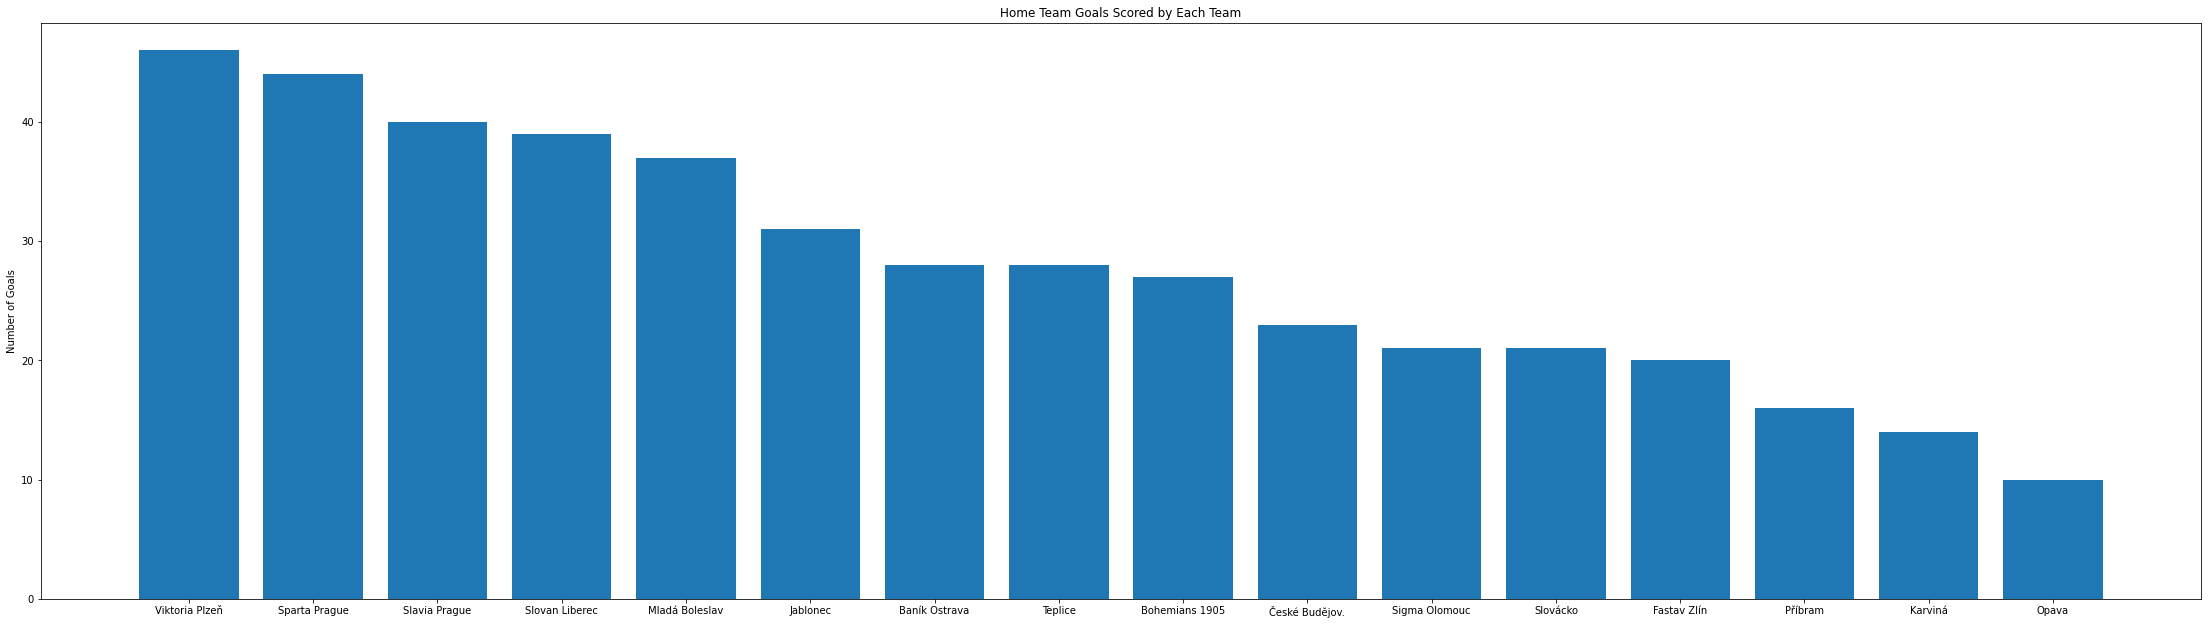

In [9]:
homebarplot1920 = Goals_summary(scores_clean, season1920[0], season1920[1]).barplot("Home Team Goals")

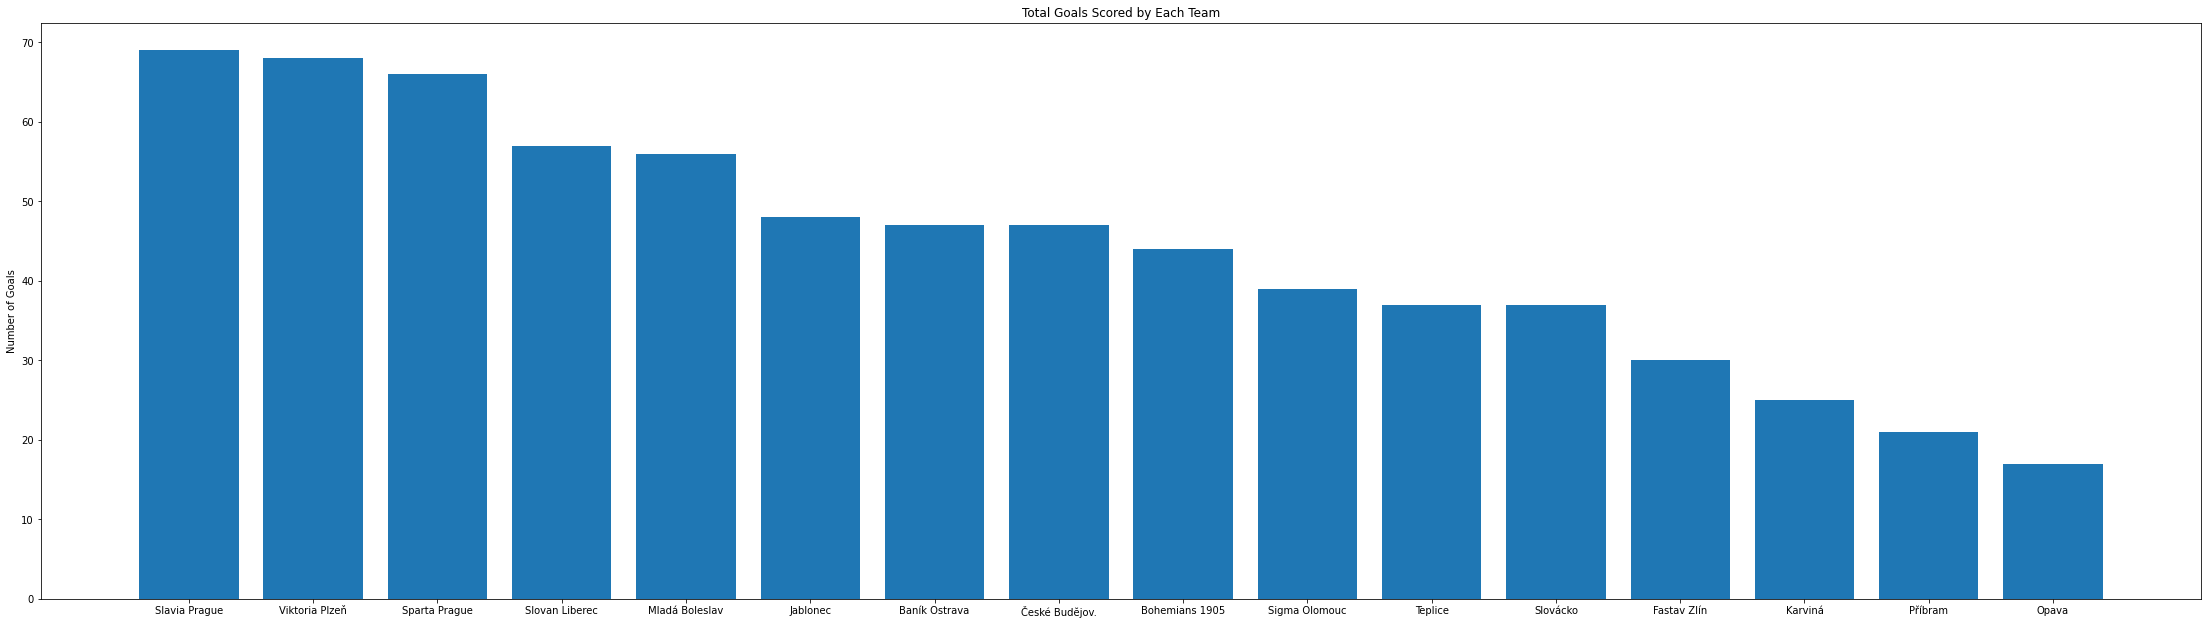

In [10]:
totalbarplot1920 = Goals_summary(scores_clean, season1920[0], season1920[1]).barplot("Total Goals")

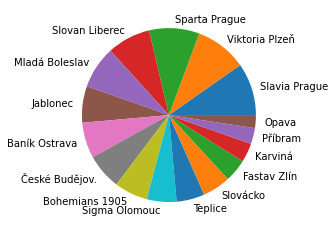

In [11]:
totalpiechart1920 = Goals_summary(scores_clean, season1920[0], season1920[1]).piechart("Total Goals")

### Season 2015/2016

In [12]:
overall1516 = Goals_summary(scores_clean, season1516[0], season1516[1]).overall()

Total Home Goals: 414
Total Away Goals: 262
Home and Away Goals Difference: 152
Total Goals: 676
Average Home Goals per Game: 1.73
Average Away Goals per Game: 1.09
Average Total Goals per Game: 1.41


In [13]:
total_pivot1516 = Goals_summary(scores_clean, season1516[0], season1516[1]).total_pivot()
total_pivot1516

,Home Team Goals,Away Team Goals,Total Goals
Team,,,
Mladá Boleslav,44,19,63
Sparta Prague,41,20,61
Viktoria Plzeň,32,25,57
Slovan Liberec,33,18,51
Slavia Prague,31,17,48
Jablonec,25,21,46
Dukla Prague,25,19,44
Slovácko,26,11,37
Zbrojovka Brno,23,14,37


### All Seasons (2015/2016 - 2020/2021)

In [14]:
total_pivot_all = Goals_summary(scores_clean, all_seasons[0], all_seasons[1]).total_pivot()
total_pivot_all

,Home Team Goals,Away Team Goals,Total Goals
Team,,,
Slavia Prague,191,148,339
Viktoria Plzeň,187,120,307
Sparta Prague,188,111,299
Mladá Boleslav,157,115,272
Jablonec,159,108,267
Slovan Liberec,150,75,225
Slovácko,115,74,189
Fastav Zlín,98,81,179
Bohemians 1905,100,78,178


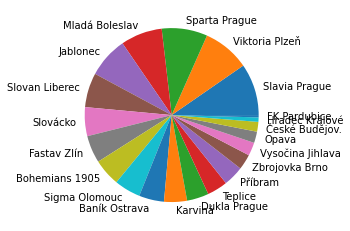

In [15]:
totalpie = Goals_summary(scores_clean, all_seasons[0], all_seasons[1]).piechart("Total Goals")

Plotting the total numbers of goals scored in each season:

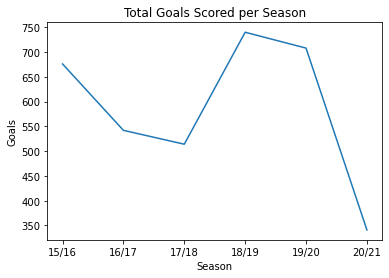

In [16]:
seasons_list = [season1516, season1617, season1718, season1819, season1920, season2021]
goals_per_season = []
for i in seasons_list:
    total_pivot = Goals_summary(scores_clean, i[0], i[1]).total_pivot()
    total_season_goals = sum(total_pivot["Total Goals"])
    goals_per_season.append(total_season_goals)
seasons_names = ["15/16", "16/17", "17/18", "18/19", "19/20", "20/21"]
plt.plot(seasons_names,goals_per_season)
plt.title('Total Goals Scored per Season')
plt.xlabel('Season')
plt.ylabel('Goals')
plt.show()

Plotting the mean numbers of goals scored in each season:

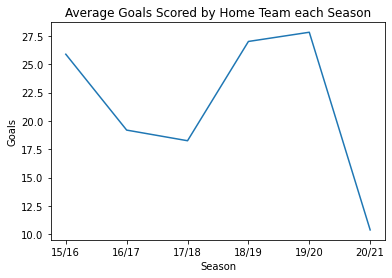

In [17]:
h_mean_goals = []
for i in seasons_list:
    home_pivot = Goals_summary(scores_clean, i[0], i[1]).home_pivot()
    h_mean_season_goals = sum(home_pivot["Home Team Goals"]) / len(home_pivot["Home Team Goals"])
    h_mean_goals.append(h_mean_season_goals)
plt.plot(seasons_names,h_mean_goals)
plt.title('Average Goals Scored by Home Team each Season')
plt.xlabel('Season')
plt.ylabel('Goals')
plt.show()